In [3]:
import pandas as pd
import numpy as np
from scipy.stats import median_abs_deviation

In [4]:
df = pd.read_csv('../Data/voitures_preprocessed_v2.csv', encoding='latin')
df.dropna()

,Prix,Kilométrage,Nombre_de_portes,Première_main,Puissance_fiscale,Année,Carburant_Diesel,Carburant_Electrique,Carburant_Essence,Carburant_Hybride,Carburant_LPG,BoiteàV_Automatique,BoiteàV_Manuelle,Origine_Dédouanée,Origine_Importée_neuve,Origine_Pas_encore_dédouanée,Origine_WW_au_Maroc,Marque_Modele,Marque_Modele_Encoded
0,140000,124999.5,5.0,0.0,6.0,2019,1,0,0,0,0,0,1,0,0,0,1,Dacia_Dokker,1.182158e+05
1,570000,134999.5,5.0,1.0,12.0,2020,1,0,0,0,0,1,0,0,0,0,1,Land_Rover_Range_Rover_Sport,3.880283e+05
2,268000,7499.5,5.0,0.0,6.0,2024,1,0,0,0,0,1,0,0,0,0,1,Opel_Astra,1.241927e+05
3,124000,224999.5,5.0,1.0,12.0,2012,1,0,0,0,0,1,0,0,0,0,1,Volkswagen_Touareg,2.933840e+06
4,400000,144999.5,5.0,0.0,12.0,2016,1,0,0,0,0,1,0,0,1,0,0,Porsche_Cayenne,4.295238e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31109,87000,184999.5,5.0,1.0,6.0,2018,1,0,0,0,0,0,1,0,0,0,1,Dacia_Logan,9.841739e+04
31110,195000,82499.5,5.0,1.0,8.0,2014,1,0,0,0,0,0,1,1,0,0,0,Volkswagen_Tiguan,3.170961e+05
31111,30000,224999.5,5.0,1.0,6.0,2001,1,0,0,0,0,0,1,0,0,1,0,Volkswagen_Golf_4,6.619796e+04
31112,162000,104999.5,5.0,1.0,6.0,2021,1,0,0,0,0,1,0,0,0,0,1,Hyundai_Accent,1.341063e+05


In [5]:
def convertir_en_age(val):
    
    if "plus" in val:
        return 2025 - 1980
    else :
        return 2025 - int(val)

df["Age"] = df["Année"].apply(convertir_en_age)

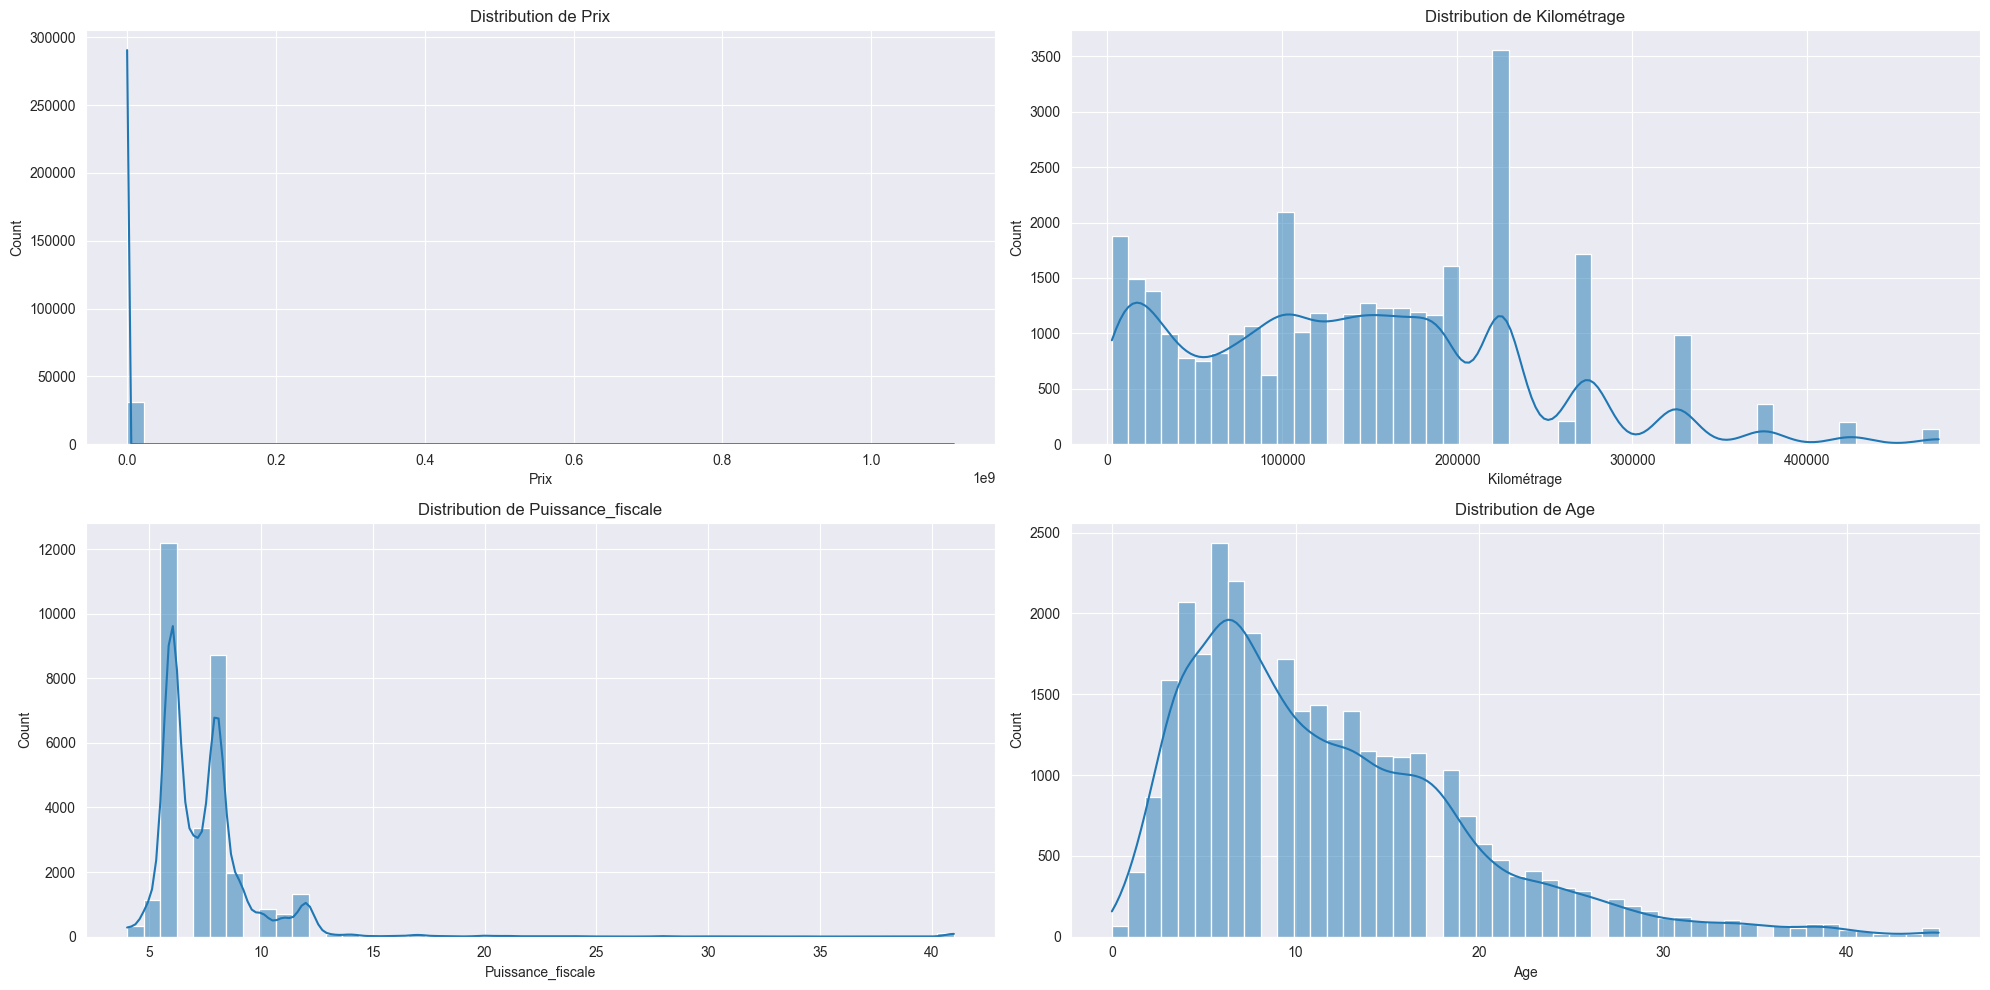

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Prix', 'Kilométrage', 'Puissance_fiscale', 'Age']

def show_histplot(list):
    plt.subplots(2, 2, figsize=(20, 10))
    for i, col in enumerate(list):
        plt.subplot(2, 2, i + 1)
        sns.histplot(df[col], bins=50, kde=True)
        plt.title(f'Distribution de {col}')
    
    plt.tight_layout()
    plt.show()

show_histplot(columns)

In [7]:
def detect_outliers(columns, threshold=3.5):
    for col in columns:
        data = df[col]
        median = np.median(data)
        mad = median_abs_deviation(data)

        if mad == 0:
            print(f"{col}: MAD = 0, pas possible de détecter les outliers.")
            continue

        modified_z_scores = 0.6745 * (data - median) / mad
        outliers = df[np.abs(modified_z_scores) > threshold]

        print(f"{col}: {len(outliers)} valeurs aberrantes détectées (méthode Z-score modifié)")


In [8]:
detect_outliers(columns)

Prix: 1312 valeurs aberrantes détectées (méthode Z-score modifié)
Kilométrage: 138 valeurs aberrantes détectées (méthode Z-score modifié)
Puissance_fiscale: 551 valeurs aberrantes détectées (méthode Z-score modifié)
Age: 456 valeurs aberrantes détectées (méthode Z-score modifié)


In [9]:
from scipy.stats import boxcox
from sklearn.preprocessing import RobustScaler

df['Prix'] = np.log1p(df['Prix'])

df['Puissance_fiscale'], _ = boxcox(df['Puissance_fiscale'])

df['Age'] = np.log1p(df['Age'])

detect_outliers(columns)

Prix: 117 valeurs aberrantes détectées (méthode Z-score modifié)
Kilométrage: 138 valeurs aberrantes détectées (méthode Z-score modifié)
Puissance_fiscale: 0 valeurs aberrantes détectées (méthode Z-score modifié)
Age: 65 valeurs aberrantes détectées (méthode Z-score modifié)


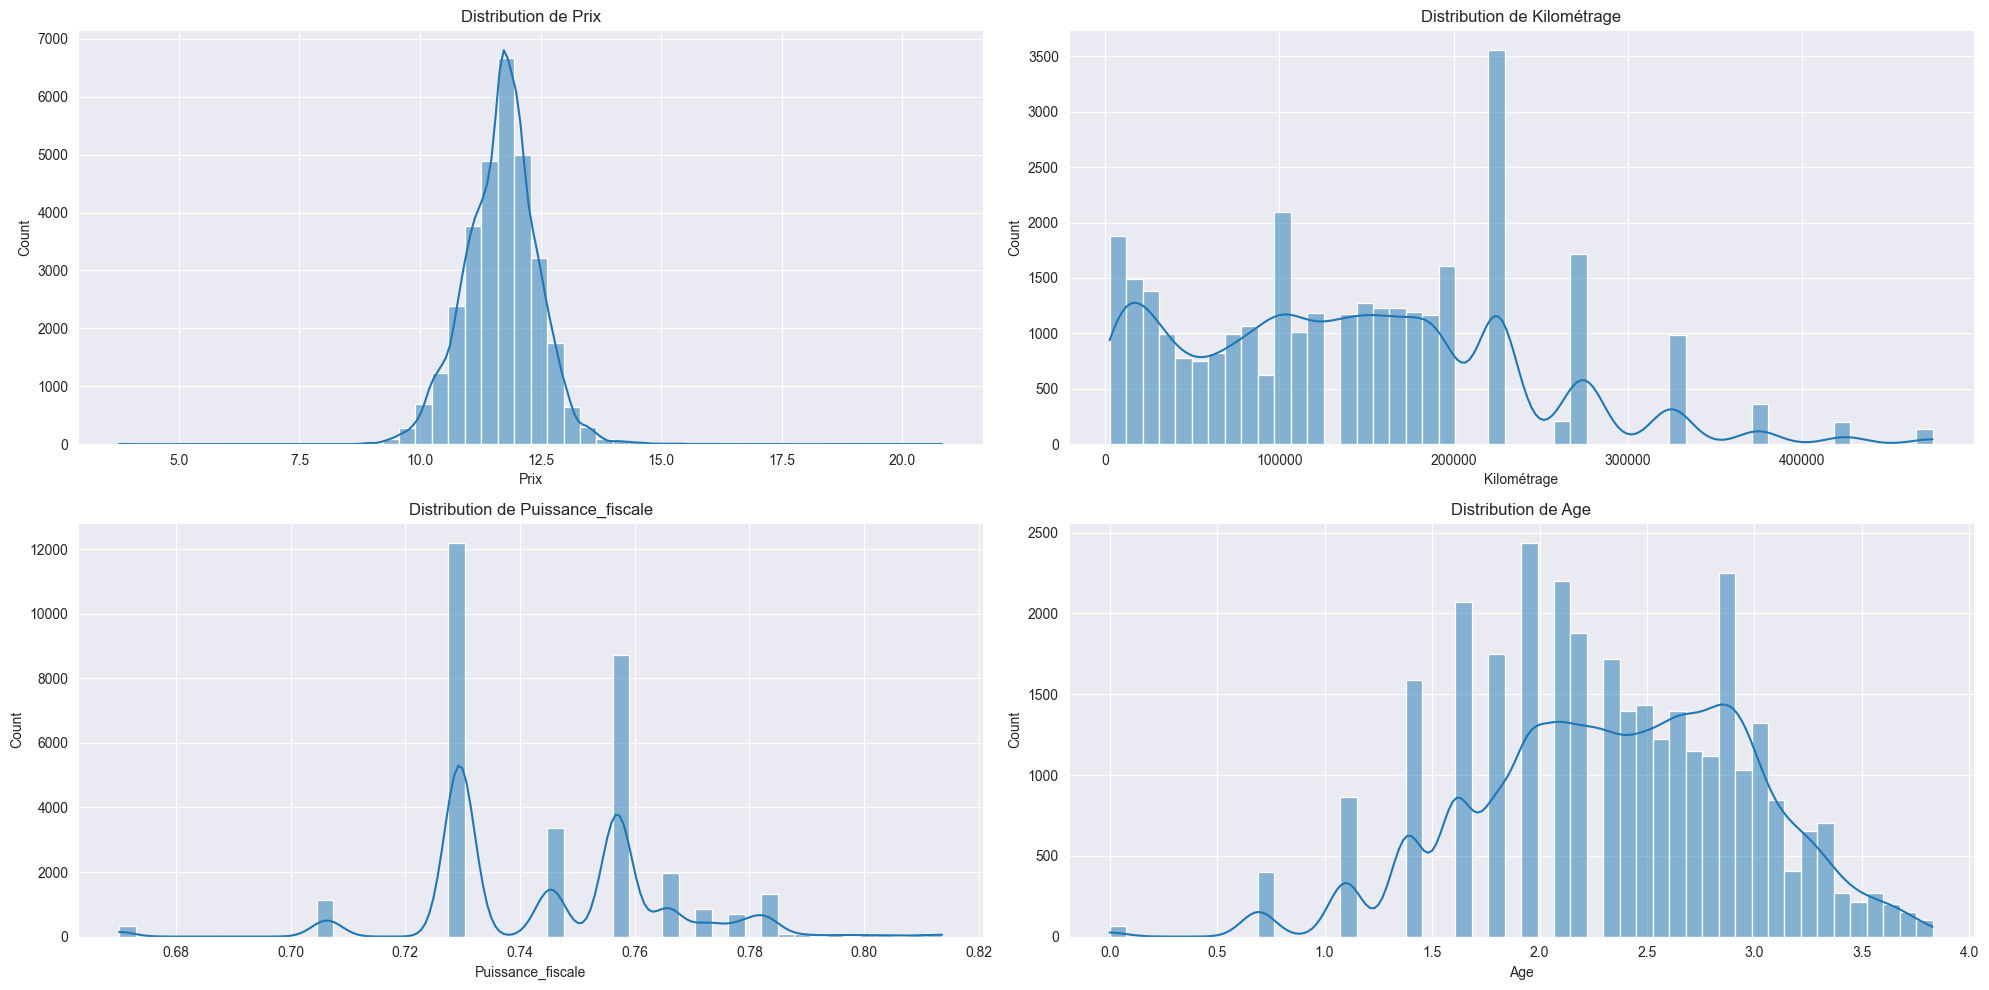

In [10]:
show_histplot(columns)

In [11]:
# df['équipements_vector'] = df['équipements_vector'].apply(
#     lambda x: list(map(float, x.strip('[]').replace("\n", " ").split()))
# )

In [13]:
# equipments_df = pd.DataFrame(equipments_pca, columns=[f'equip_{i}' for i in range(equipments_pca.shape[1])])
# df = pd.concat([df, equipments_df], axis=1)


In [14]:
df.drop(columns=['Année', 'Marque_Modele'], inplace=True)


In [15]:
try:
    df.to_csv('voitures_preprocessed_v3.csv', index=False, encoding='ISO-8859-1')
    print("file saved")
    
except:
    print("file didn't save")

file saved


In [16]:
df

,Prix,Kilométrage,Nombre_de_portes,Première_main,Puissance_fiscale,Carburant_Diesel,Carburant_Electrique,Carburant_Essence,Carburant_Hybride,Carburant_LPG,BoiteàV_Automatique,BoiteàV_Manuelle,Origine_Dédouanée,Origine_Importée_neuve,Origine_Pas_encore_dédouanée,Origine_WW_au_Maroc,Marque_Modele_Encoded,Age
0,11.849405,124999.5,5.0,0.0,0.729458,1,0,0,0,0,0,1,0,0,0,1,1.182158e+05,1.945910
1,13.253393,134999.5,5.0,1.0,0.782509,1,0,0,0,0,1,0,0,0,0,1,3.880283e+05,1.791759
2,12.498746,7499.5,5.0,0.0,0.729458,1,0,0,0,0,1,0,0,0,0,1,1.241927e+05,0.693147
3,11.728045,224999.5,5.0,1.0,0.782509,1,0,0,0,0,1,0,0,0,0,1,2.933840e+06,2.639057
4,12.899222,144999.5,5.0,0.0,0.782509,1,0,0,0,0,1,0,0,1,0,0,4.295238e+05,2.302585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31109,11.373675,184999.5,5.0,1.0,0.729458,1,0,0,0,0,0,1,0,0,0,1,9.841739e+04,2.079442
31110,12.180760,82499.5,5.0,1.0,0.756952,1,0,0,0,0,0,1,1,0,0,0,3.170961e+05,2.484907
31111,10.308986,224999.5,5.0,1.0,0.729458,1,0,0,0,0,0,1,0,0,1,0,6.619796e+04,3.218876
31112,11.995358,104999.5,5.0,1.0,0.729458,1,0,0,0,0,1,0,0,0,0,1,1.341063e+05,1.609438
